In [1]:
import cv2          
import numpy as np     
import matplotlib.pyplot as plt
# path to input image is specified and 
# image is loaded with imread command 
from PIL import Image

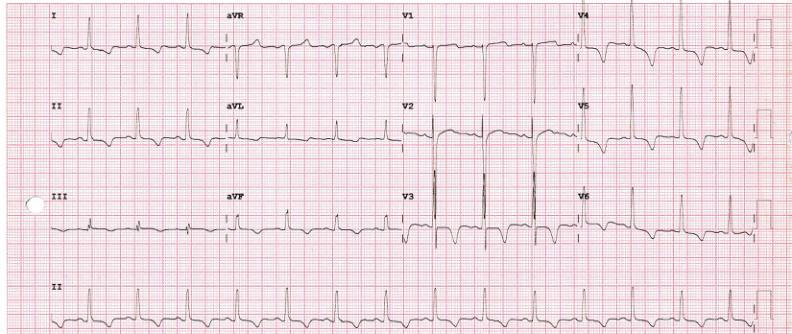

In [2]:
img = Image.open('./test_images/AFib1.jpg')
img

In [3]:
img = np.array(img)
img.shape

(334, 792, 3)

# Method 1
Changing RGB pixels above 200 to 255 and rest to 0

In [4]:
test_img = img.copy()

In [5]:
# ret,test_img = cv2.threshold(test_img,200,255,cv2.THRESH_BINARY)

In [6]:
def change_pixel(r,g,b):
    if r > 200 or g > 200 or b > 200:
        return 255,255,255
    else:
        return 0, 0 ,0

new_img = np.zeros(test_img.shape)
for i,i_val in enumerate(test_img):
    for j,j_val in enumerate(i_val):
        r,g,b = change_pixel(j_val[0],j_val[1],j_val[2])
        new_img[i][j][0]=r
        new_img[i][j][1]=g
        new_img[i][j][2]=b
new_img = new_img.astype('uint8')

In [7]:
new_img = new_img.astype('uint8')

In [8]:
new_img.shape

(334, 792, 3)

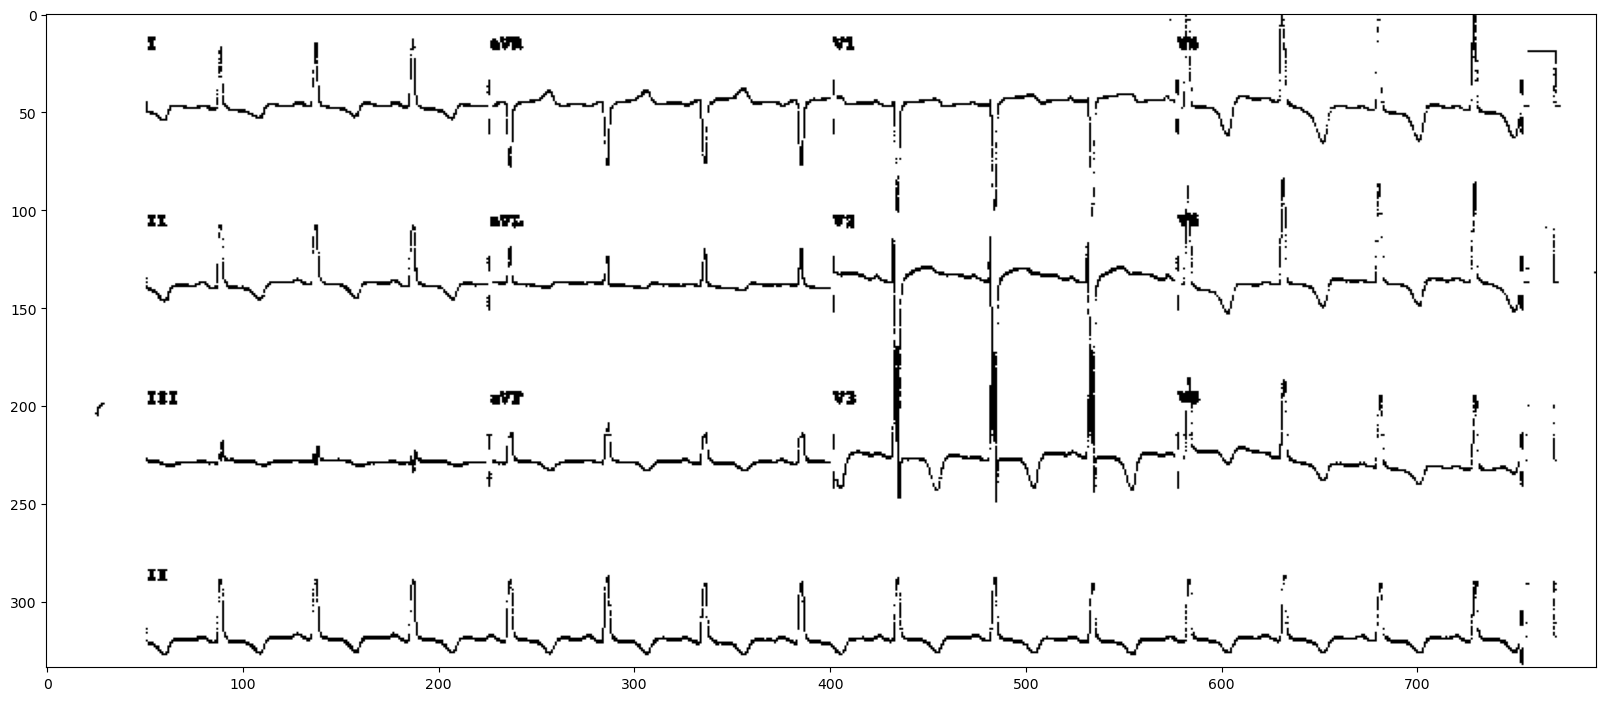

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(new_img)

In [10]:
kernel = np.ones((2, 2), np.uint8)

In [11]:
# cv_img = cv2.cvtColor(new_img, cv2.)

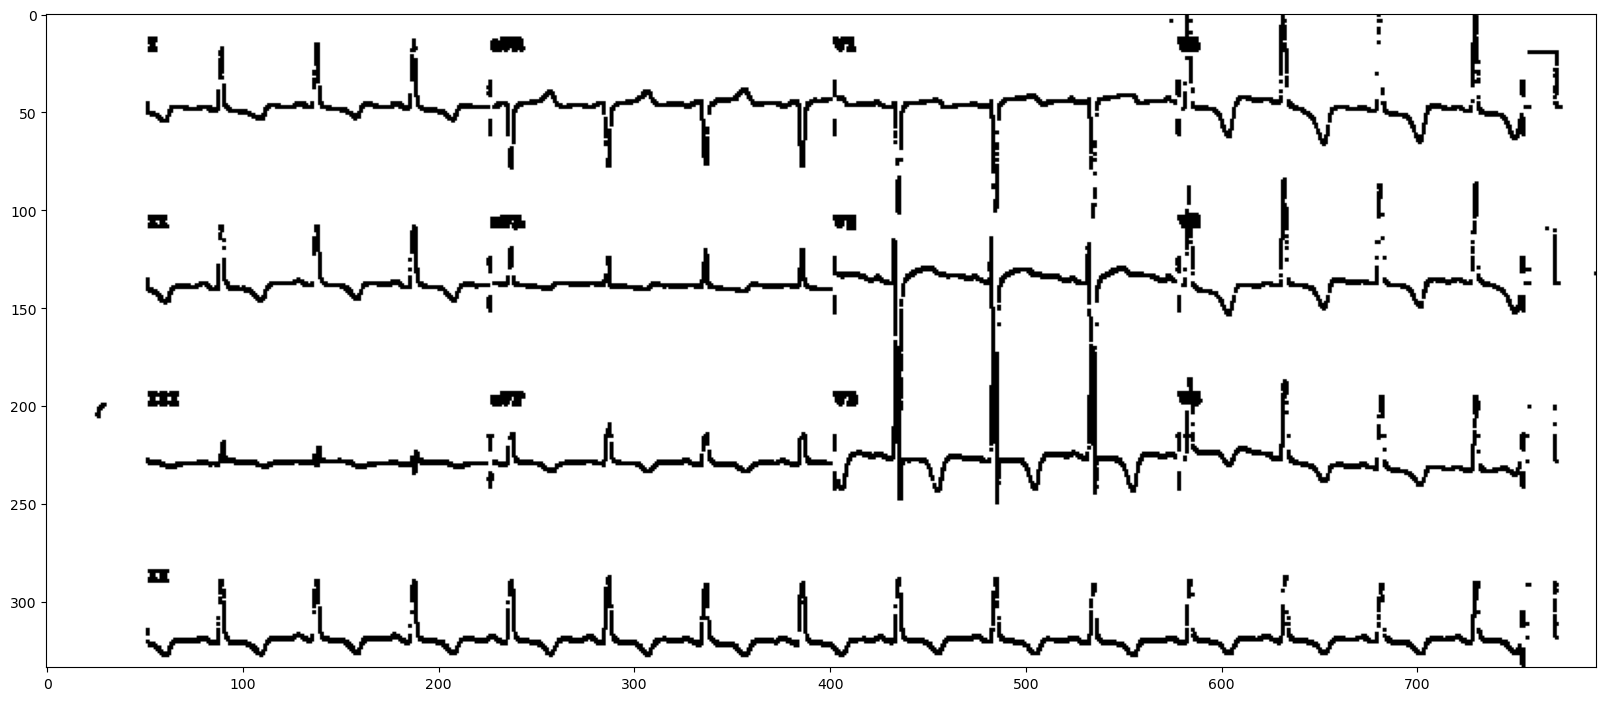

In [12]:
img_erosion = cv2.erode(new_img, kernel, iterations=1)
plt.figure(figsize=(20,20))
plt.imshow(img_erosion)

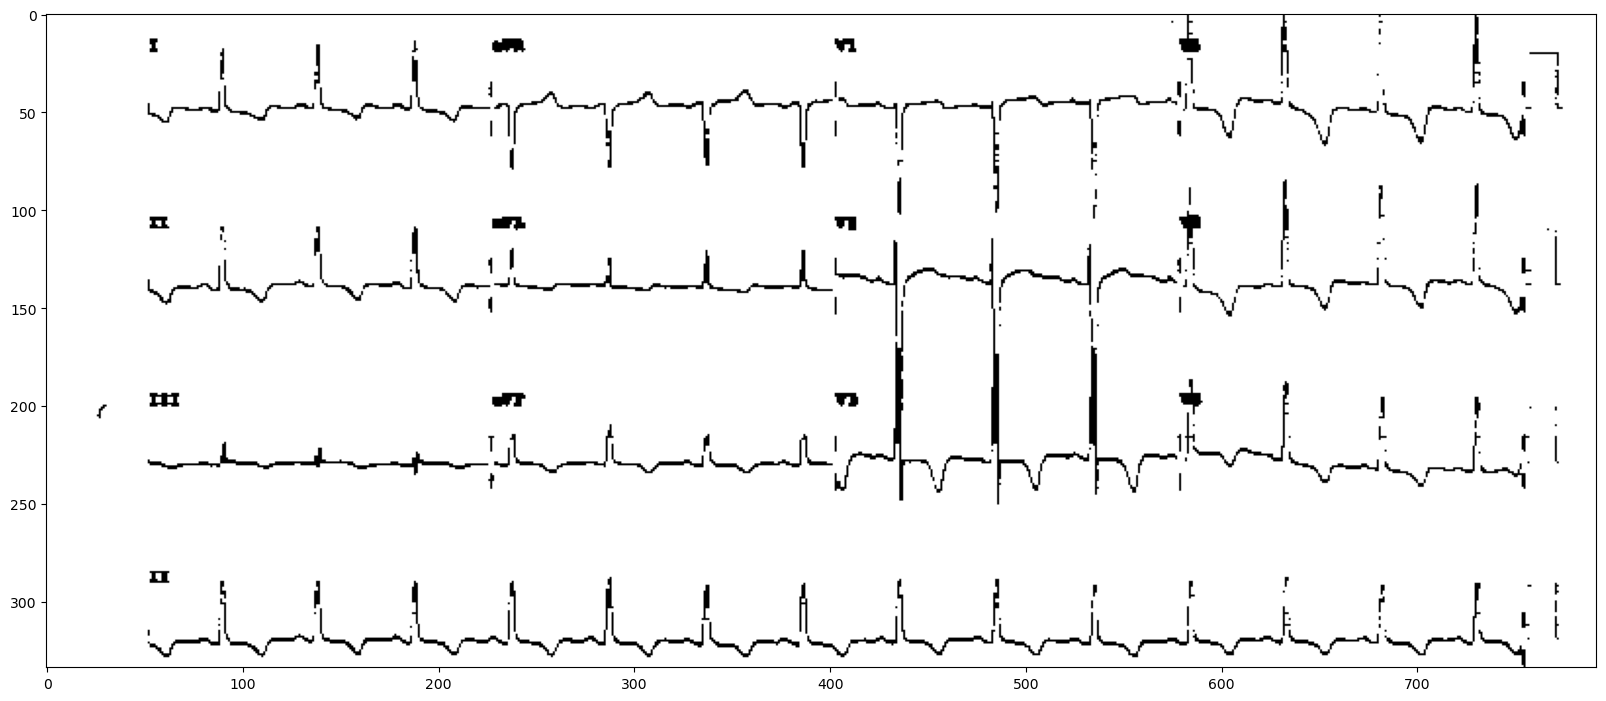

In [13]:
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
plt.figure(figsize=(20,20))
plt.imshow(img_dilation)

# Vizualizing all 3 channels in grayscale

In [14]:
img = Image.open('./test_images/EK_00001.jpg')
img = np.array(img)
img.shape

(1728, 2296, 3)

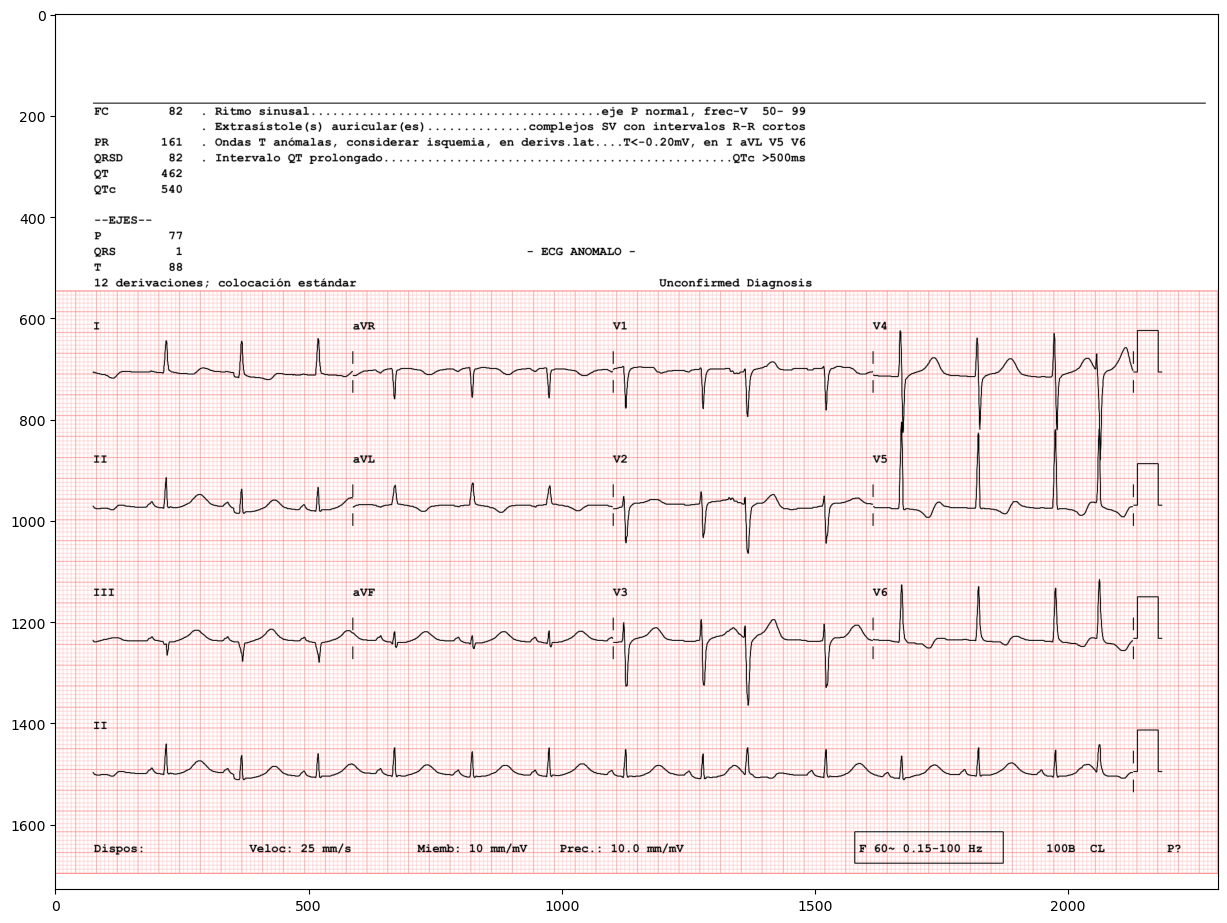

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(img)

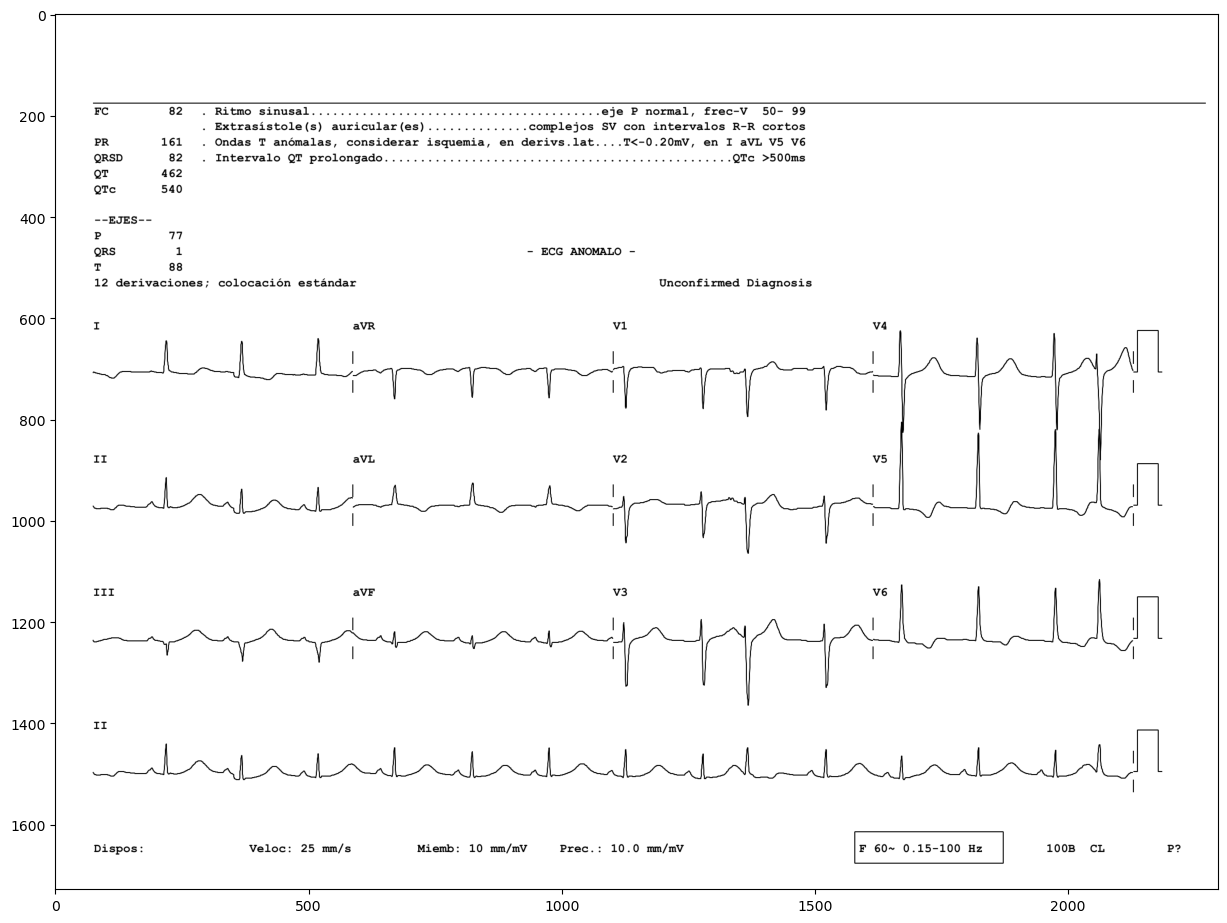

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,0],cmap='gray')

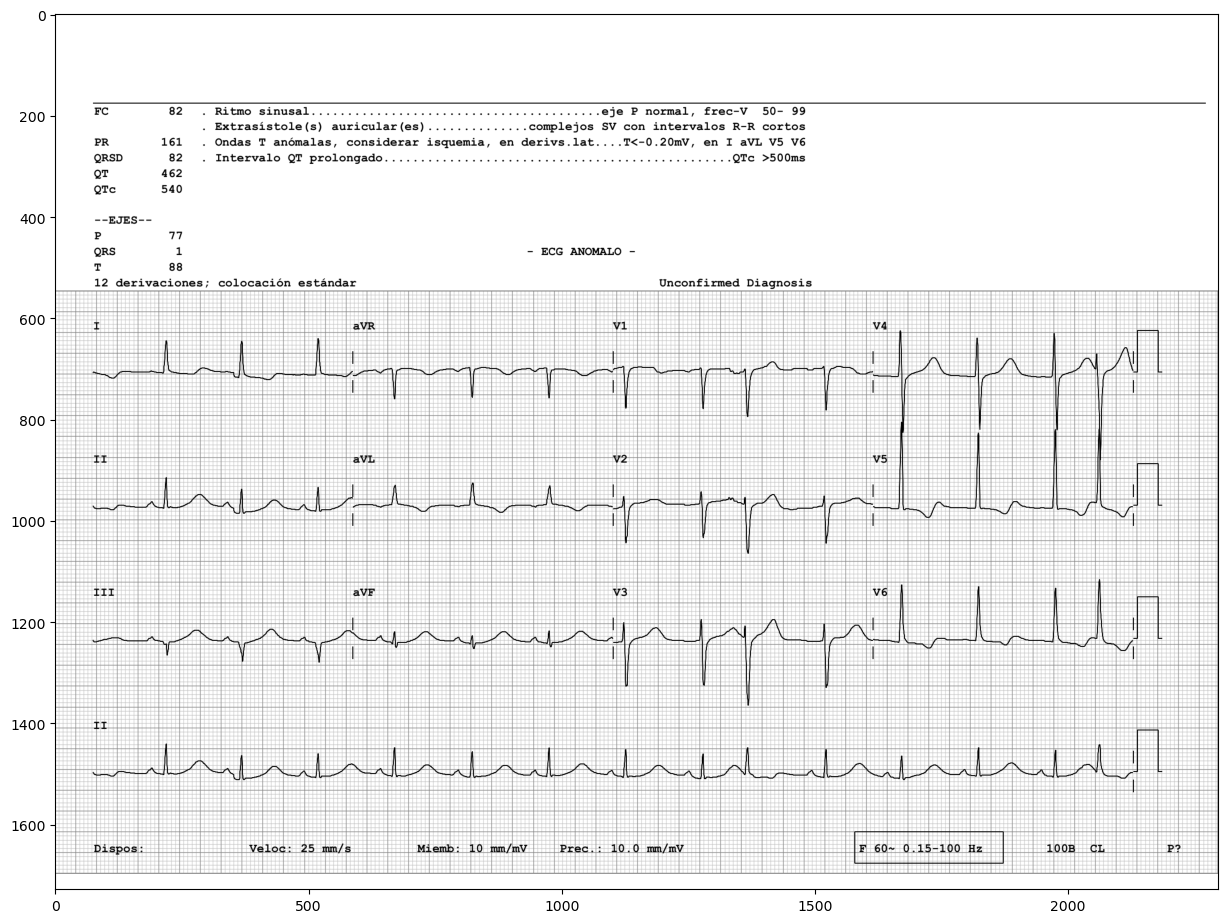

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,1],cmap='gray')

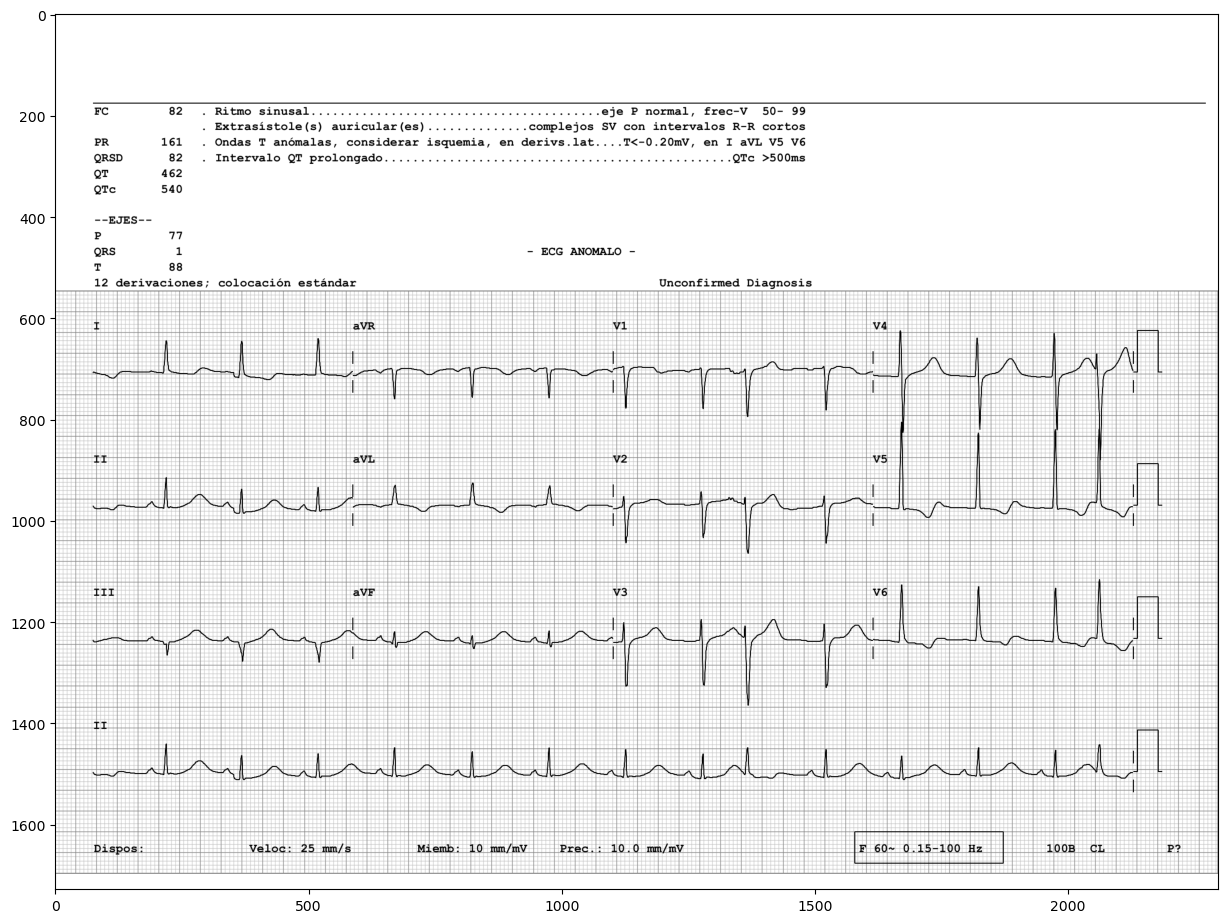

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,2], cmap='gray')

# 

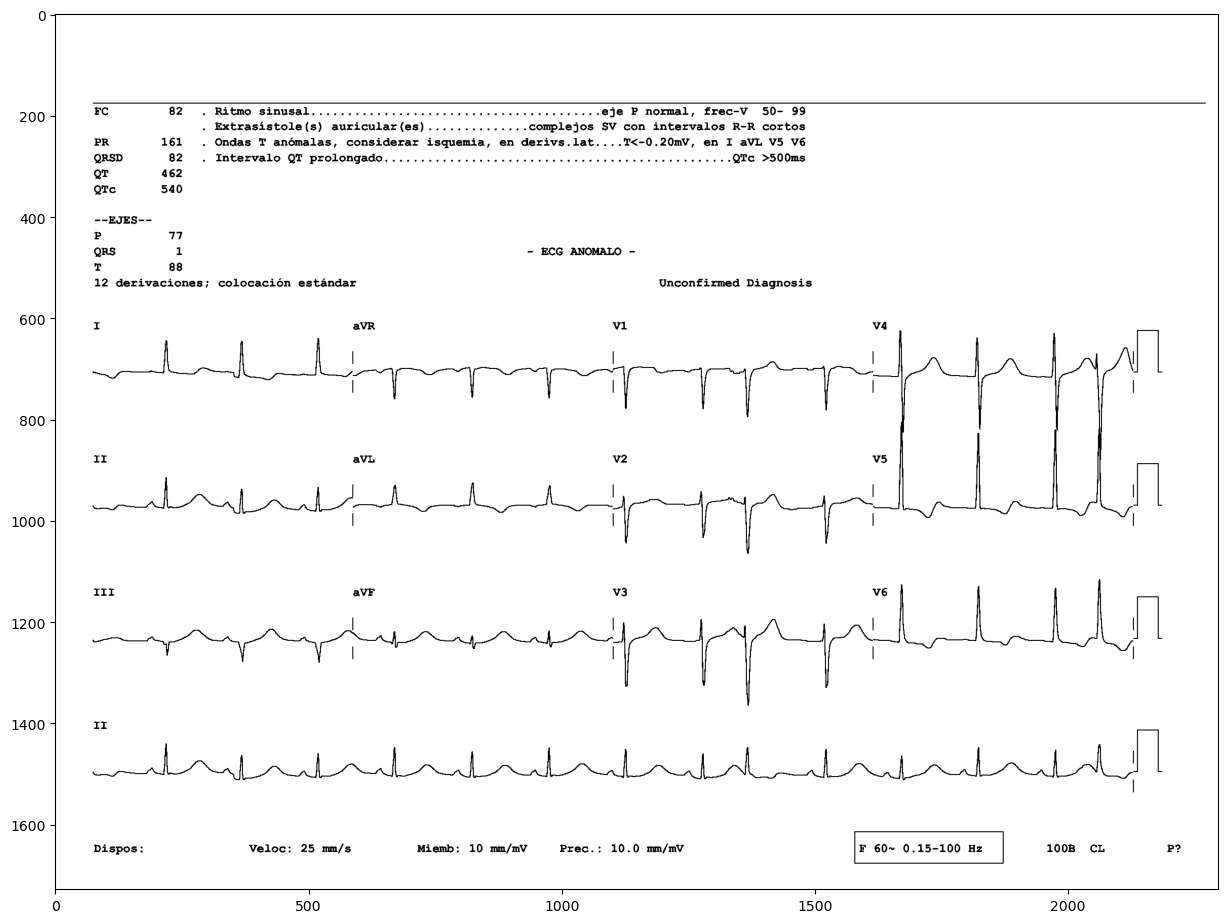

In [22]:
red_mask = np.where(img[:, :, 0] > 200, 1, 0)
blue_mask = np.where(img[:, :, 1] > 200, 1, 0)
green_mask = np.where(img[:, :, 2] > 200, 1, 0)

new_img = np.logical_or.reduce((red_mask,blue_mask,green_mask))
plt.figure(figsize=(15,15))
plt.imshow(new_img, cmap='gray')